간편식 수요 예측과 품질 개선을 통한 시장 점유율 1위 유지 및 매출 증대 

위아이티 3기 / 김아영


<불량품 요인 파악 분석 계획>

- 데이터 전처리
- 새로운 데이터 프레임 만들기
- 충전실, 실링, 쿠킹 온도 -> 불량품목간 온도 상관성 파악 #scatter plot
- 오류 조치 시간 -> 이상치 확인 #kde plot

In [1]:
import pandas as pd
from datetime import datetime
import io
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import seaborn as sns



cooking = pd.read_csv('C:/Users/User/OneDrive/바탕 화면/Data00_간편식공정/Cooking_data_set.csv')
error = pd.read_csv('C:/Users/User/OneDrive/바탕 화면/Data00_간편식공정/Error_Message.csv')



* Error Message -> 제품 생산 불량 요인 시각화 #bar plot

In [2]:
error.head()

,순번,생산라인코드,생산라인명,생산일자,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,품목코드,품목명,오류발생작업장명
0,10,D004,PET병,2011-01-03,14:16,14:24,8,W0056B4,위치조정,13D02080,참깨흑임자드레싱,충전실
1,7,D011,2동 오리히로,2011-01-04,18:54,19:03,9,W005711,대기,16A01016,시아스고구마샐러드믹스,충전실
2,2,C002,쿠커 #2,2011-01-05,9:51,9:58,7,W003452,충전,23K01321,나가사키베이스(재),쿠킹실
3,13,P004,PET#1,2011-01-05,18:20,20:44,144,W0076B2,구동부,13R02051,이마트베스트돈까스소스,포장실
4,17,C004,쿠커 #4,2011-01-10,22:32,1:16,164,W003721,충진 미종료,23D02080,참깨흑임자드레싱(재),쿠킹실


* 충전실, 실링, 쿠킹 온도 -> 불량품목간 온도 상관성 파악 #scatter plot

품목 코드 기준으로 데이터 합치기

In [3]:
# 데이터프레임 합치기

cooking_error = pd.merge(cooking, error, on=['품목코드','순번','생산라인코드','생산라인명', '생산일자', '품목명'], how='inner')

In [4]:
cooking_error

,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명
0,10,D004,PET병,2011-01-03,13D02080,참깨흑임자드레싱,W005,71.125831,93.425831,127.878281,22.968,201.430,NaN,14:16,14:24,8,W0056B4,위치조정,충전실
1,7,D011,2동 오리히로,2011-01-04,16A01016,시아스고구마샐러드믹스,W005,71.587470,103.987470,138.736120,23.166,204.974,NaN,18:54,19:03,9,W005711,대기,충전실
2,2,C002,쿠커 #2,2011-01-05,23K01321,나가사키베이스(재),W003,70.540995,102.440995,137.135195,23.129,204.249,NaN,9:51,9:58,7,W003452,충전,쿠킹실
3,13,P004,PET#1,2011-01-05,13R02051,이마트베스트돈까스소스,W007,71.401189,111.901189,146.585739,23.123,200.068,NaN,18:20,20:44,144,W0076B2,구동부,포장실
4,17,C004,쿠커 #4,2011-01-10,23D02080,참깨흑임자드레싱(재),W003,70.649333,105.149333,139.680183,23.021,200.541,NaN,22:32,1:16,164,W003721,충진 미종료,쿠킹실
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,3,D084,2동 로타리#4,2021-10-25,13A00725,샘표강된장양념,W005,71.671267,112.571266,147.339967,23.179,211.102,NaN,9:46,11:49,123,W005713,수리,충전실
1076,1,C045,쿠커 #5,2021-10-25,23U02003,유기아가베시럽665g/올가홀(재),W003,69.827929,86.927929,121.388229,22.974,200.317,NaN,8:58,9:04,6,W003446,ph 이상,쿠킹실
1077,7,D088,냉동밥 내포장#1,2021-10-28,1BA03709,NaN,W005,72.585609,93.885609,128.549109,23.109,204.160,NaN,8:57,9:33,36,W0054F1,품목 교체,충전실
1078,1,D005,3.2마요,2021-10-28,16B06099,맛있는골드마요네즈3.2kg,W005,71.764168,108.664168,142.862968,22.799,201.039,NaN,10:50,11:06,16,W0058Z9,기타,충전실


In [5]:
# error_message 데이터에서 '순번'이 10인 데이터의 개수 세기
count_10 = len(error[error['순번'] == 10])

print("순번이 10인 데이터 개수:", count_10)

순번이 10인 데이터 개수: 49


In [6]:
# cooking_error 데이터에서 '순번'이 10인 데이터의 개수 세기
cooking_error_10 = len(cooking_error[cooking_error['순번'] == 10])
cooking_error_10

50

충전실, 실링, 쿠킹 온도 -> 불량품목간 온도 상관성 파악 #scatter plot

1) 불량품목의 충전실 온도 평균

In [7]:
cooking_error['충전실온도'].mean()

71.11198853932129

2. 불량품목의 실링 온도 평균

In [8]:
cooking_error['실링온도'].mean()

101.26550705774261

3. 불량품목의 쿠킹 온도 평균

In [9]:
cooking_error['쿠킹온도'].mean()

135.81896006695368

* 불량품 중 오류발생작업장명 (쿠킹실, 충천실, 포장실, 계량실) 별 실링온도, 쿠킹온도 상관관계

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',family = 'Malgun Gothic')
sns.set(font='Malgun Gothic')

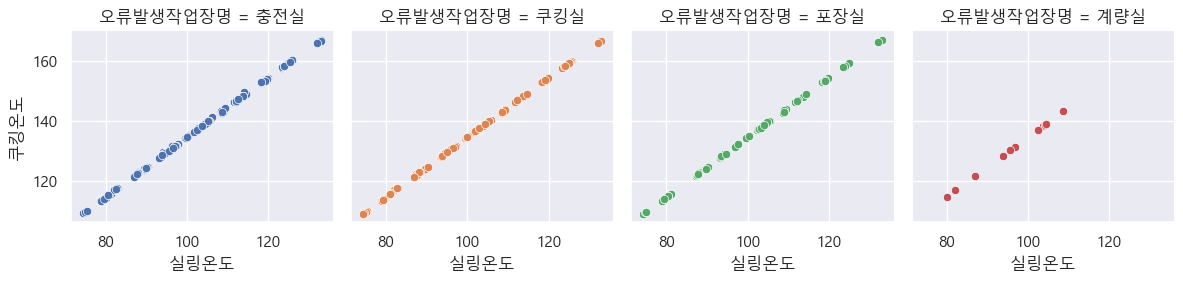

In [11]:
grid = sns.FacetGrid(data=cooking_error, col='오류발생작업장명', hue = '오류발생작업장명')
grid.map(sns.scatterplot, '실링온도', '쿠킹온도')

* 불량품 중 오류발생작업장명 (쿠킹실, 충천실, 포장실, 계량실) 별 충전실온도, 실링온도 상관관계

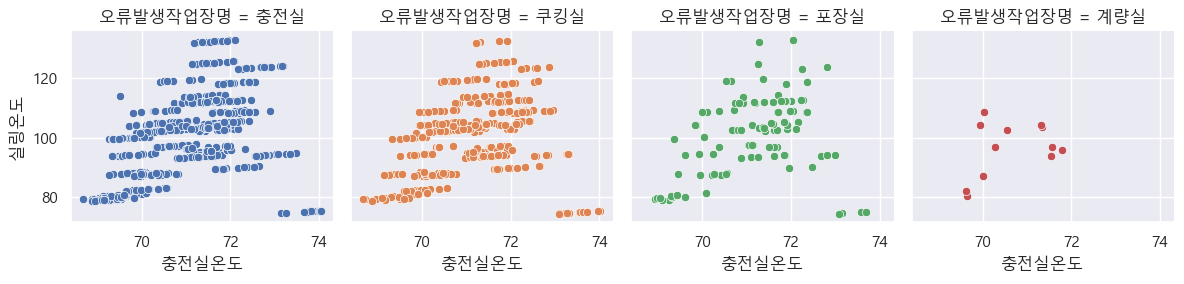

In [12]:
grid = sns.FacetGrid(data=cooking_error, col='오류발생작업장명', hue = '오류발생작업장명')
grid.map(sns.scatterplot, '충전실온도', '실링온도')

* 불량품 중 오류발생작업장명 (쿠킹실, 충천실, 포장실, 계량실) 별 충전실온도, 쿠킹온도 상관관계

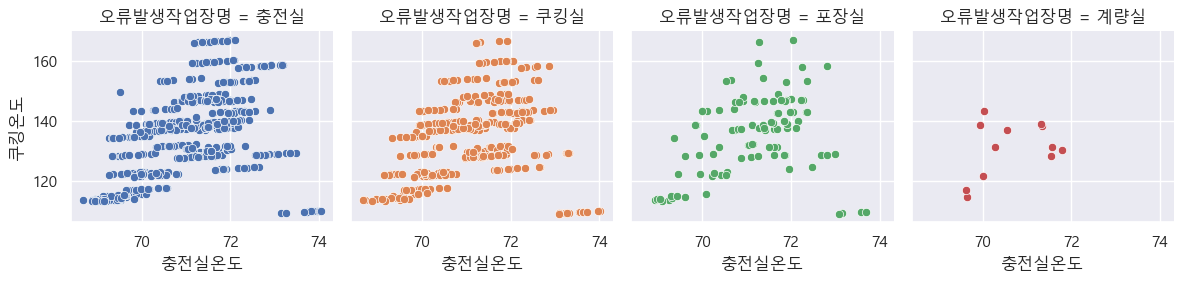

In [13]:
grid = sns.FacetGrid(data=cooking_error, col='오류발생작업장명', hue = '오류발생작업장명')
grid.map(sns.scatterplot, '충전실온도', '쿠킹온도')

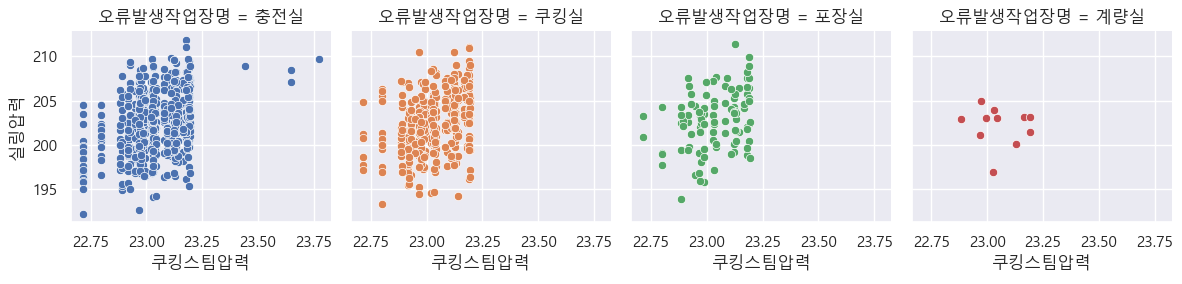

In [14]:
grid = sns.FacetGrid(data=cooking_error, col='오류발생작업장명', hue = '오류발생작업장명')
grid.map(sns.scatterplot, '쿠킹스팀압력', '실링압력')

불량품의 충전실 온도 시각화

<Axes: >

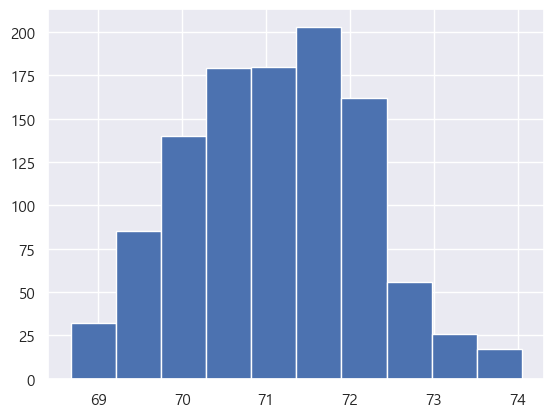

In [15]:
cooking_error['충전실온도'].hist()

불량품의 실링 온도 시각화

<Axes: >

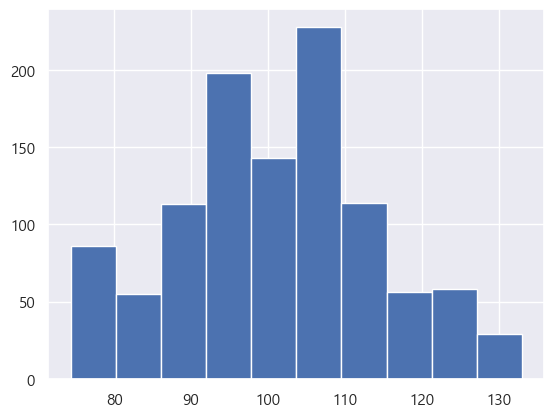

In [16]:
cooking_error['실링온도'].hist()

불량품의 쿠킹온도 시각화

<Axes: >

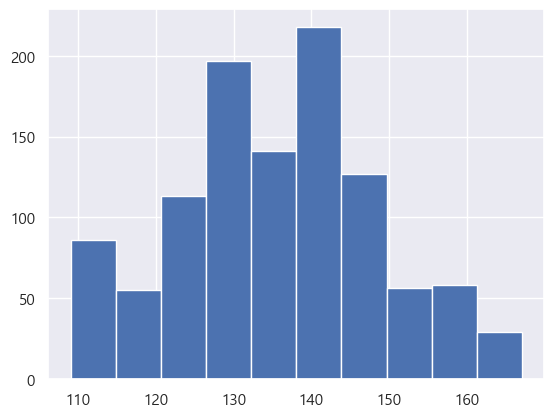

In [17]:
cooking_error['쿠킹온도'].hist()